In [346]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pandas as pd
import shapefile as shp
import seaborn as sns
import numpy as np




#reading the shapefile
shap = gpd.read_file('Shapes/district.shp')

print("done")

done


In [347]:
shap.head()

,FID,LONGNAME,SHORTNAME,DISTRICT,COLOR,TOTAL,TARGET_DEV,TARGET_D_1,TOTAL18,TOTALHISP,...,WHITE,BLACK,AIAN,ASIAN,HPI,OTHER,MLTMN,Shape__Are,Shape__Len,geometry
0,1,District 1,D1,1,-851848832,76830,1758,2.34,64257,24552,...,44656,3637,783,5080,50,20935,1689,0.002985,0.380208,"POLYGON ((-71.06406 42.36901, -71.06413 42.369..."
1,2,District 2,D2,2,465990528,77466,2394,3.19,70183,6640,...,53120,4520,269,13604,55,4893,1005,0.001969,0.341635,"POLYGON ((-71.07307 42.35125, -71.07194 42.351..."
2,3,District 3,D3,3,494969216,73285,-1787,-2.38,60834,11898,...,29284,14990,492,13190,45,9927,5357,0.011007,0.957769,"POLYGON ((-71.04935 42.33035, -71.04891 42.330..."
3,4,District 4,D4,4,-65408,72917,-2155,-2.87,54939,17409,...,10515,40030,653,3093,44,11569,7013,0.001324,0.296487,"POLYGON ((-71.08390 42.30760, -71.08369 42.307..."
4,5,District 5,D5,5,412292224,75436,364,0.48,59652,18191,...,20392,35584,475,2022,42,12727,4194,0.002300,0.313325,"POLYGON ((-71.08546 42.28105, -71.08543 42.281..."


In [348]:
#using the 311 cleaned file

df_311= pd.read_csv('Shapes/311_cleaned.csv')




/var/folders/sv/v002sx6n7r57yl0d615d6b6c0000gn/T/ipykernel_19572/2677895399.py:3: DtypeWarning: Columns (15,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311= pd.read_csv('Shapes/311_cleaned.csv')


In [349]:
df_311['district'] = ''

df_311['fault'] = ''

df_311

,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,...,ls_date,bldg_area,res_area,yr_built,owner_name,owner_addr,owner_city,owner_zip,district,fault
0,0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,,
1,1,101001745959,2016-03-14 09:59:00,2016-03-21 09:59:38,2018-05-14 15:44:54,OVERDUE,Closed,Case Closed. Closed date : 2018-05-14 15:44:54...,Illegal Occupancy,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,,
2,2,101002384775,2018-03-03 12:43:00,2018-03-05 12:43:21,NaN,OVERDUE,Open,,Work w/out Permit,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,,
3,3,101002724652,2018-11-10 11:54:00,2018-11-19 08:30:00,2018-11-14 08:53:35,ONTIME,Closed,Case Closed. Closed date : 2018-11-14 08:53:35...,Maintenance - Homeowner,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,,
4,4,101002788418,2019-01-28 09:25:00,2019-01-30 09:25:50,2019-03-12 14:50:38,OVERDUE,Closed,Case Closed. Closed date : 2019-03-12 14:50:38...,Work w/out Permit,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357331,357331,101004541181,2022-10-27 14:05:00,2022-11-03 14:05:54,NaN,ONTIME,Open,,Recycling Cart Return,Public Works Department,...,nan//,6128.0,4024.0,1920.0,LEE DAVID K Y,37 RADNOR RD FL #1,BRIGHTON,2135.0,,
357332,357332,101004541222,2022-10-27 14:17:00,2022-11-17 14:17:02,NaN,ONTIME,Open,,Request for Recycling Cart,Public Works Department,...,nan//,1592.0,1496.0,1989.0,DEA ARTHUR K,204 BOWEN ST,SOUTH BOSTON,2127.0,,
357333,357333,101004541616,2022-10-27 18:35:40,2022-10-31 08:30:00,NaN,ONTIME,Open,,Illegal Dumping,Public Works Department,...,2009/10/30.,2530.0,1090.0,1975.0,GRIMES JASON M,10 OAK RD,MARLBOROUGH,01752,,
357334,357334,101004427681,2022-08-15 10:07:15,2022-08-17 10:07:14,2022-08-15 11:14:21,ONTIME,Closed,Case Closed. Closed date : Mon Aug 15 11:14:21...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,1346.0,700.0,1920.0,COLLINS JOHN J,44 BIGELOW ST,MARLBOROUGH,01752,,


In [350]:
"""
We sorted the districts using the neighborhoods based on the following area covered by districts
see more here https://en.wikipedia.org/wiki/Boston_City_Council

"""

conditions = [(df_311['neighborhood'] == 'East Boston'),
              (df_311['neighborhood'] == 'Charlestown'),
              (df_311['neighborhood'] == 'South Boston / South Boston Waterfront'),
              (df_311['neighborhood'] == 'South End'), (df_311['neighborhood'] == 'South Boston'),
              (df_311['neighborhood'] == 'Boston'),
              (df_311['neighborhood'] == 'Downtown / Financial District'),
              (df_311['neighborhood'] == 'Mattapan'),
              (df_311['neighborhood'] == 'Roslindale'),
              (df_311['neighborhood'] == 'Greater Mattapan'),
              (df_311['neighborhood'] == 'Jamaica Plain'),
              (df_311['neighborhood'] == 'Hyde Park'),
              (df_311['neighborhood'] == 'West Roxbury'),
              (df_311['neighborhood'] == 'Roxbury'),
              (df_311['neighborhood'] == 'Dorchester'),
              (df_311['neighborhood'] == 'Back Bay'),
              (df_311['neighborhood'] == 'Beacon Hill'),
              (df_311['neighborhood'] == 'Mission Hill'),
              (df_311['neighborhood'] == 'Fenway / Kenmore / Audubon Circle / Longwood'),
              (df_311['neighborhood'] == 'Allston / Brighton'),
              (df_311['neighborhood'] == 'Allston'),(df_311['neighborhood'] == 'Brighton'),
              (df_311['neighborhood'] == 'Chestnut Hill')
             ]

#violation types to be matched with
districts = ['1', '1', '2', '2', '2', '2','2', '4', '4', '4','4','5', '6', '7', '3', '8', '8', '8', '8', '9', '9', '9', '9']


df_311['district'] = np.select(conditions, districts )

In [351]:
"""
sorting the violation type depending on who we think is at fault (landlord vs city)

"""

conditions = [(df_311['violation_type'] == 'Building Violations'),
              (df_311['violation_type'] == 'Sanitation Requests'),
              (df_311['violation_type'] == 'Enforcement Violations'),
              (df_311['violation_type'] == 'Housing Complaints'),
              (df_311['violation_type'] == 'Housing Violations'),
              (df_311['violation_type'] == 'Civic Maintain Requests')]

fault = ['landlord','city','landlord','landlord','landlord','landlord']

df_311['fault'] = np.select(conditions, fault)

df_311

,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,...,ls_date,bldg_area,res_area,yr_built,owner_name,owner_addr,owner_city,owner_zip,district,fault
0,0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,1,landlord
1,1,101001745959,2016-03-14 09:59:00,2016-03-21 09:59:38,2018-05-14 15:44:54,OVERDUE,Closed,Case Closed. Closed date : 2018-05-14 15:44:54...,Illegal Occupancy,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,1,landlord
2,2,101002384775,2018-03-03 12:43:00,2018-03-05 12:43:21,NaN,OVERDUE,Open,,Work w/out Permit,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,1,landlord
3,3,101002724652,2018-11-10 11:54:00,2018-11-19 08:30:00,2018-11-14 08:53:35,ONTIME,Closed,Case Closed. Closed date : 2018-11-14 08:53:35...,Maintenance - Homeowner,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,1,landlord
4,4,101002788418,2019-01-28 09:25:00,2019-01-30 09:25:50,2019-03-12 14:50:38,OVERDUE,Closed,Case Closed. Closed date : 2019-03-12 14:50:38...,Work w/out Permit,Inspectional Services,...,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,1,landlord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357331,357331,101004541181,2022-10-27 14:05:00,2022-11-03 14:05:54,NaN,ONTIME,Open,,Recycling Cart Return,Public Works Department,...,nan//,6128.0,4024.0,1920.0,LEE DAVID K Y,37 RADNOR RD FL #1,BRIGHTON,2135.0,9,city
357332,357332,101004541222,2022-10-27 14:17:00,2022-11-17 14:17:02,NaN,ONTIME,Open,,Request for Recycling Cart,Public Works Department,...,nan//,1592.0,1496.0,1989.0,DEA ARTHUR K,204 BOWEN ST,SOUTH BOSTON,2127.0,2,city
357333,357333,101004541616,2022-10-27 18:35:40,2022-10-31 08:30:00,NaN,ONTIME,Open,,Illegal Dumping,Public Works Department,...,2009/10/30.,2530.0,1090.0,1975.0,GRIMES JASON M,10 OAK RD,MARLBOROUGH,01752,6,landlord
357334,357334,101004427681,2022-08-15 10:07:15,2022-08-17 10:07:14,2022-08-15 11:14:21,ONTIME,Closed,Case Closed. Closed date : Mon Aug 15 11:14:21...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,1346.0,700.0,1920.0,COLLINS JOHN J,44 BIGELOW ST,MARLBOROUGH,01752,9,landlord


In [352]:
df_311['district'] = df_311['district'].astype(int)



In [353]:
#splitting the dFrame depending on the district

district_1 = df_311[df_311['district']== 1]

district_2 = df_311[df_311['district']== 2]

district_3 = df_311[df_311['district']== 3]

district_4 = df_311[df_311['district']== 4]

district_5 = df_311[df_311['district']== 5]

district_6 = df_311[df_311['district']== 6]

district_7 = df_311[df_311['district']== 7]

district_8 = df_311[df_311['district']== 8]

district_9= df_311[df_311['district']== 9]

print("done")

done


In [354]:
top_5_d5 = district_5['owner_name'].value_counts().nlargest(5)

top_5_d5

CORSI RICHARD                      85
RICHARDSON FRANCIS E + KATHLEEN    75
KOVACEV RACHEL                     75
SISUM JOANNE M & ROGER W           75
MUNOZ EDWIN                        75
Name: owner_name, dtype: int64

In [355]:
#creating seperate dFrames depending on the top5 violators per district, then making it into a new dFrame

#dictrict 1

top5_d1_1 = district_1[district_1['owner_name']== 'SOLSKINN PROPERTIES LLC']
top5_d1_2 = district_1[district_1['owner_name']== 'RACHAK SAMUEL']
top5_d1_3 = district_1[district_1['owner_name']== 'PD LAND TRUST LLC TS']
top5_d1_4 = district_1[district_1['owner_name']== 'ONE-33  COTTAGE  LLC']
top5_d1_5 = district_1[district_1['owner_name']== 'GOROVITS IRINA']


#district 2
top5_d2_1 = district_2[district_2['owner_name']== 'BOSTON HOUSING AUTHORITY']
top5_d2_2 = district_2[district_2['owner_name']== 'HISTORIC SOUTH END LP']
top5_d2_3 = district_2[district_2['owner_name']== 'CITY OF BOSTON']
top5_d2_4 = district_2[district_2['owner_name']== 'CLARENDON PROPERTIES LLC']
top5_d2_5 = district_2[district_2['owner_name']== 'FOLEY DIANE L']

#district 3
top5_d3_1 = district_3[district_3['owner_name']== 'CITY OF BOSTON']
top5_d3_2 = district_3[district_3['owner_name']== 'AENEAS 4 LLC']
top5_d3_3 = district_3[district_3['owner_name']== 'MORRIS GEORGE K']
top5_d3_4 = district_3[district_3['owner_name']== '372-380 WASHINGTON STREET LLC']
top5_d3_5 = district_3[district_3['owner_name']== 'ORU-LAWRENCE UWAGBOE']

#district 4
top5_d4_1 = district_4[district_4['owner_name']== 'CITY OF BOSTON']
top5_d4_2 = district_4[district_4['owner_name']== 'RIVER FOUR THIRTY LLC']
top5_d4_3 = district_4[district_4['owner_name']== 'RZ REALTY TRUST,']
top5_d4_4 = district_4[district_4['owner_name']== 'MAYO ONE LLC']
top5_d4_5 = district_4[district_4['owner_name']== 'JEAN SERGE']

#district 5
top5_d5_1 = district_5[district_5['owner_name']== 'CORSI RICHARD']
top5_d5_2 = district_5[district_5['owner_name']== 'RICHARDSON FRANCIS E + KATHLEEN']
top5_d5_3 = district_5[district_5['owner_name']== 'KOVACEV RACHEL']
top5_d5_4 = district_5[district_5['owner_name']== 'SISUM JOANNE M & ROGER W']
top5_d5_5 = district_5[district_5['owner_name']== 'MUNOZ EDWIN']

#concatnation of the dFrames
top5 = pd.concat([top5_d1_1, top5_d1_2, top5_d1_3, top5_d1_4, top5_d1_5,
                  top5_d2_1, top5_d2_2, top5_d2_3, top5_d2_4, top5_d2_5,
                  top5_d3_1, top5_d3_2, top5_d3_3, top5_d3_4, top5_d3_5,
                  top5_d4_1, top5_d4_2, top5_d4_3, top5_d4_4, top5_d4_5,
                  top5_d5_1, top5_d5_2, top5_d5_3, top5_d5_4, top5_d5_5])


top5

,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,...,ls_date,bldg_area,res_area,yr_built,owner_name,owner_addr,owner_city,owner_zip,district,fault
57733,57733,101001745788,2016-03-14 08:19:06,2016-03-16 08:30:00,2016-03-14 11:34:21,ONTIME,Closed,Case Closed. Closed date : 2016-03-14 11:34:21...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,4246.0,3720.0,1880.0,SOLSKINN PROPERTIES LLC,40 EVERETT ST,BOSTON,02128,1,landlord
57734,57734,101001745789,2016-03-14 08:19:30,2016-03-16 08:30:00,2016-03-14 11:36:26,ONTIME,Closed,Case Closed. Closed date : 2016-03-14 11:36:26...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,4246.0,3720.0,1880.0,SOLSKINN PROPERTIES LLC,40 EVERETT ST,BOSTON,02128,1,landlord
57735,57735,101001763697,2016-04-08 07:56:33,2016-04-12 08:30:00,2016-04-08 08:56:24,ONTIME,Closed,Case Closed. Closed date : 2016-04-08 08:56:24...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,4246.0,3720.0,1880.0,SOLSKINN PROPERTIES LLC,40 EVERETT ST,BOSTON,02128,1,landlord
57736,57736,101001767053,2016-04-12 18:06:55,2016-04-15 08:30:00,2016-04-12 20:35:24,ONTIME,Closed,Case Closed. Closed date : 2016-04-12 20:35:24...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,4246.0,3720.0,1880.0,SOLSKINN PROPERTIES LLC,40 EVERETT ST,BOSTON,02128,1,landlord
57737,57737,101001878252,2016-08-08 14:26:07,2016-08-10 14:26:07,2016-08-08 16:01:32,ONTIME,Closed,Case Closed. Closed date : 2016-08-08 16:01:32...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,4246.0,3720.0,1880.0,SOLSKINN PROPERTIES LLC,40 EVERETT ST,BOSTON,02128,1,landlord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306468,306468,101004172853,2022-02-09 15:11:00,2024-01-30 15:11:43,2022-02-10 08:34:32,ONTIME,Closed,Case Closed. Closed date : Thu Feb 10 08:34:32...,Egress,Inspectional Services,...,nan//,5726.0,3341.0,1920.0,MUNOZ EDWIN,35 GEORGE ST,HYDE PARK,2136.0,5,landlord
306474,306474,101004173785,2022-02-10 09:37:00,2022-03-03 09:37:33,2022-03-01 10:55:52,ONTIME,Closed,Case Closed Case Resolved NEW CART#21026814 D...,Request for Recycling Cart,Public Works Department,...,nan//,5726.0,3341.0,1920.0,MUNOZ EDWIN,35 GEORGE ST,HYDE PARK,2136.0,5,city
306480,306480,101004426719,2022-08-14 13:03:44,2022-09-26 08:30:00,2022-08-16 14:30:03,ONTIME,Closed,Case Closed. Closed date : Tue Aug 16 14:30:03...,DISP8/16Short Term Rental,Inspectional Services,...,nan//,5726.0,3341.0,1920.0,MUNOZ EDWIN,35 GEORGE ST,HYDE PARK,2136.0,5,landlord
306486,306486,101004174262,2022-02-10 13:58:59,2022-02-14 13:59:15,2022-02-11 07:11:03,ONTIME,Closed,Case Closed. Closed date : Fri Feb 11 07:11:03...,Improper Storage of Trash (Barrels),Public Works Department,...,nan//,5726.0,3341.0,1920.0,MUNOZ EDWIN,35 GEORGE ST,HYDE PARK,2136.0,5,landlord


<AxesSubplot: >

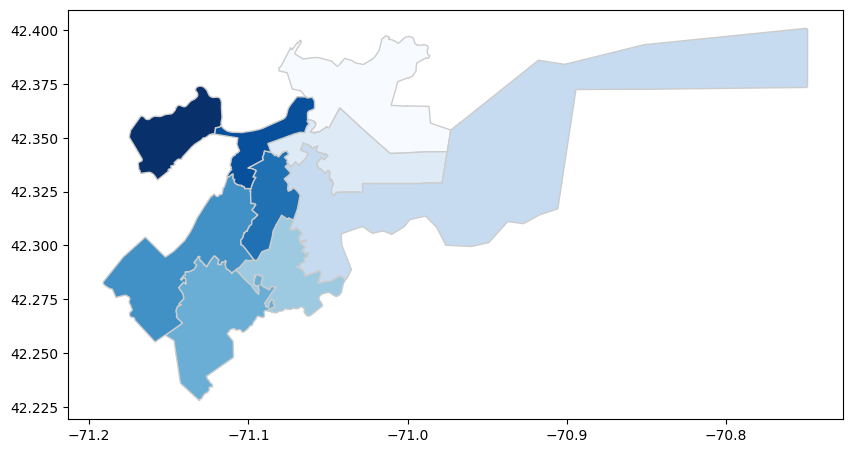

In [356]:
#shape file test
fig, ax = plt.subplots(figsize = (10,10))
shap.plot(ax = ax, cmap = 'Blues', edgecolor='0.8')


/var/folders/sv/v002sx6n7r57yl0d615d6b6c0000gn/T/ipykernel_19572/2494745946.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


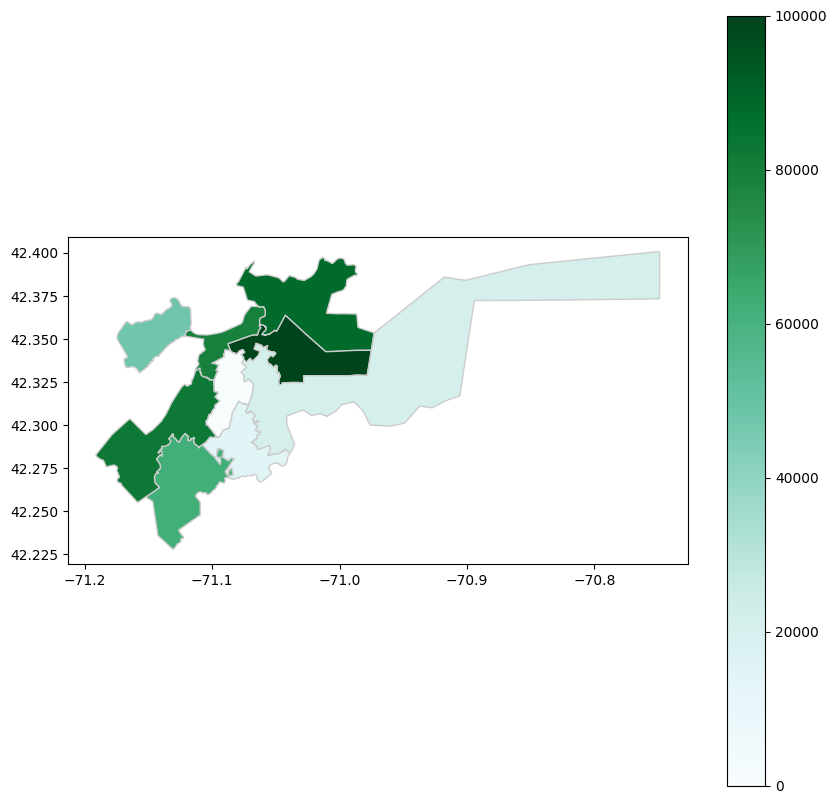

In [357]:
#District census population

population = 'TOTAL'

fig, ax = plt.subplots(figsize = (10,10))
shap.plot(ax = ax, column= population, cmap = 'BuGn', edgecolor='0.8')


vmin, vmax = 0, 100000
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


In [358]:
df= pd.read_csv('Shapes/df_all.csv')
df.dtypes

Unnamed: 0              int64
violation_type         object
description            object
address                object
owner                  object
latitude              float64
longitude             float64
violation_date         object
year_built            float64
violation_severity     object
dtype: object

In [359]:
#creating points

geometry = [Point(xy) for xy in zip(district_1['longitude'], district_1['latitude'])]



/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


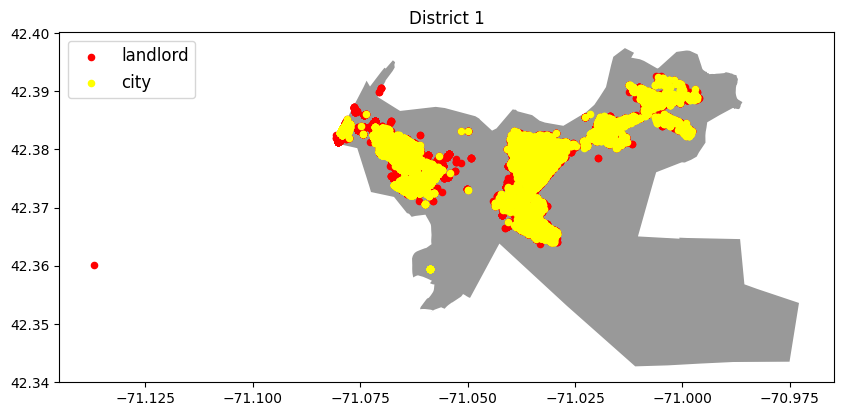

In [360]:
shape_1 = shap.loc[shap['LONGNAME']=='District 1']

crs = {'init': 'epsg:4326'}

geo_district_1 = gpd.GeoDataFrame(district_1, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 1')

shape_1.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_1[geo_district_1['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_1[geo_district_1['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})



<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 1'}>

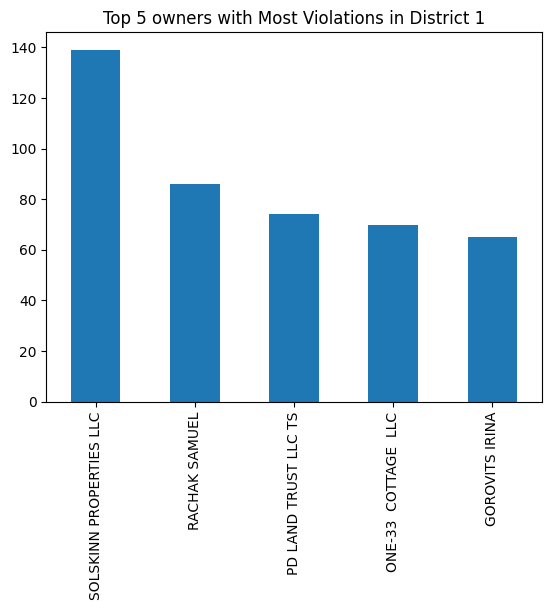

In [361]:
district_1['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 1')

In [362]:
geometry = [Point(xy) for xy in zip(district_2['longitude'], district_2['latitude'])]

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


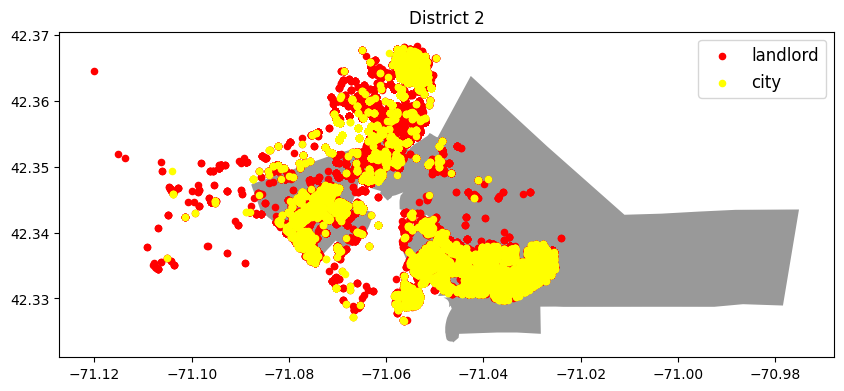

In [363]:

#geometry = [Point(xy) for xy in zip(district_2['longitude'], district_2['latitude'])]

shape_2 = shap.loc[shap['LONGNAME']=='District 2']

crs = {'init': 'epsg:4326'}

geo_district_2 = gpd.GeoDataFrame(district_2, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 2')

shape_2.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_2[geo_district_2['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_2[geo_district_2['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 2'}>

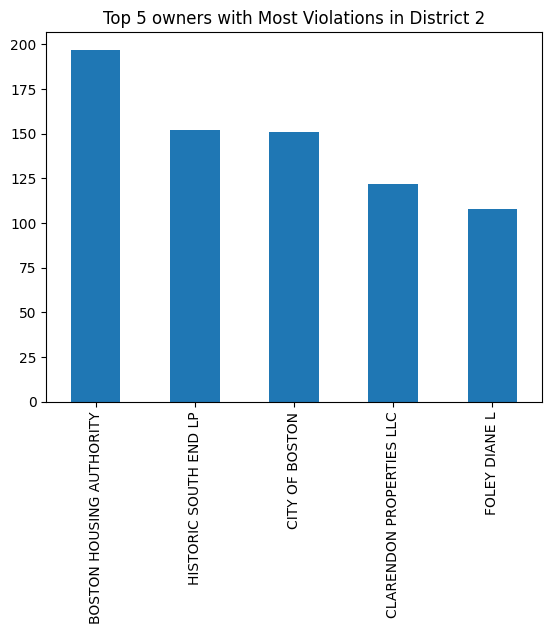

In [364]:
# Getting the top 5 owners with most violations in district 2
district_2['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 2')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


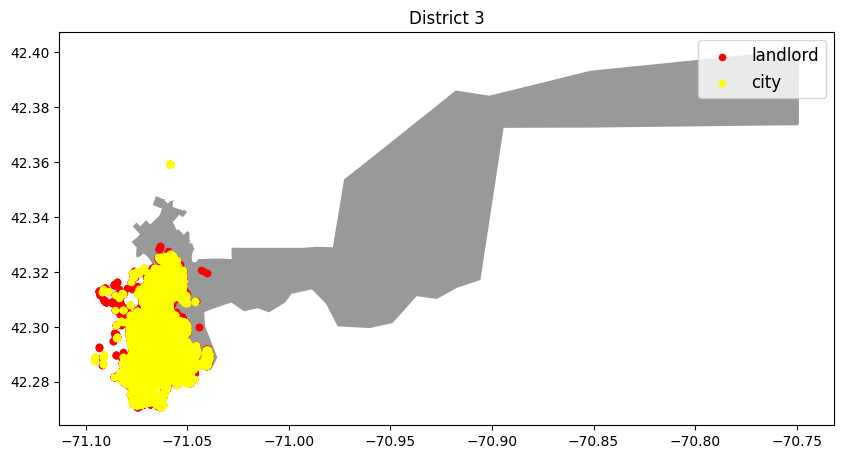

In [365]:

geometry = [Point(xy) for xy in zip(district_3['longitude'], district_3['latitude'])]

shape_3 = shap.loc[shap['LONGNAME']=='District 3']

crs = {'init': 'epsg:4326'}

geo_district_3 = gpd.GeoDataFrame(district_3, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 3')

shape_3.plot(ax = ax, alpha = 0.4, color = 'black' )

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_3[geo_district_3['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_3[geo_district_3['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 3'}>

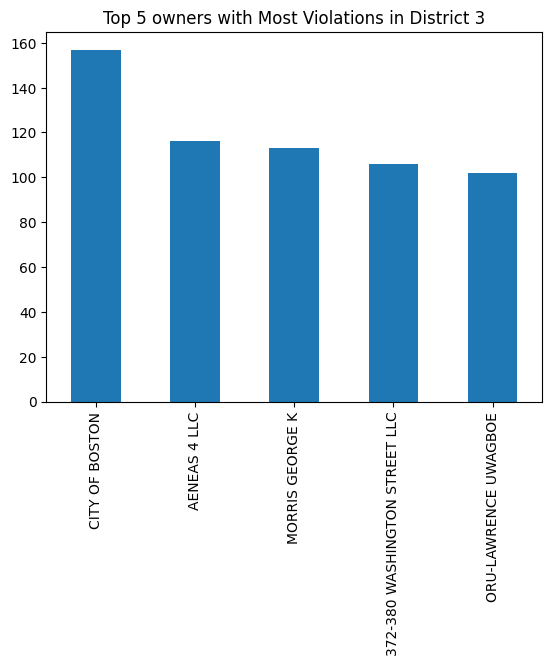

In [366]:
# Getting the top 5 owners with most violations in district 3
district_3['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 3')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


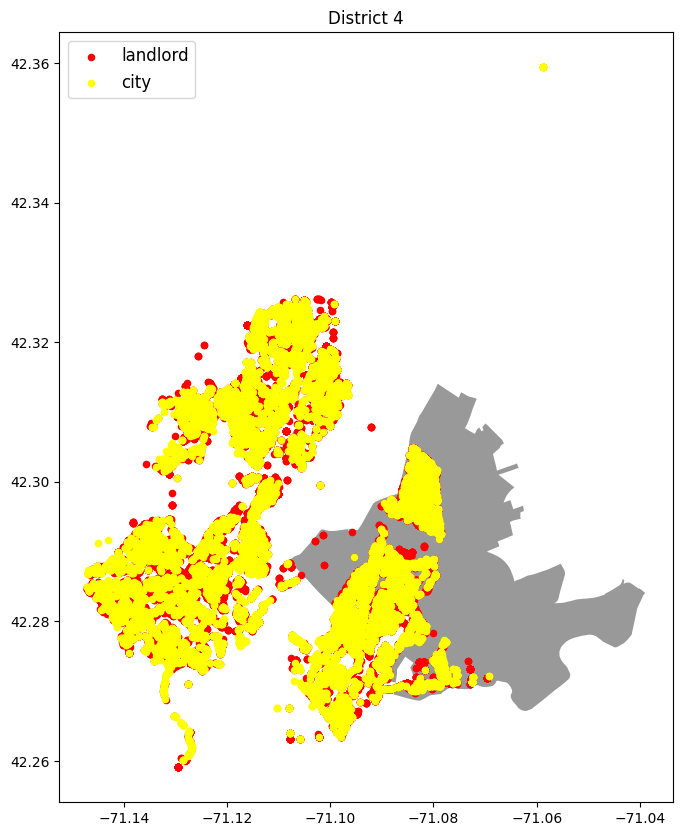

In [367]:

geometry = [Point(xy) for xy in zip(district_4['longitude'], district_4['latitude'])]

shape_4 = shap.loc[shap['LONGNAME']=='District 4']

crs = {'init': 'epsg:4326'}

geo_district_4 = gpd.GeoDataFrame(district_4, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 4')

shape_4.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_4[geo_district_4['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_4[geo_district_4['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 4'}>

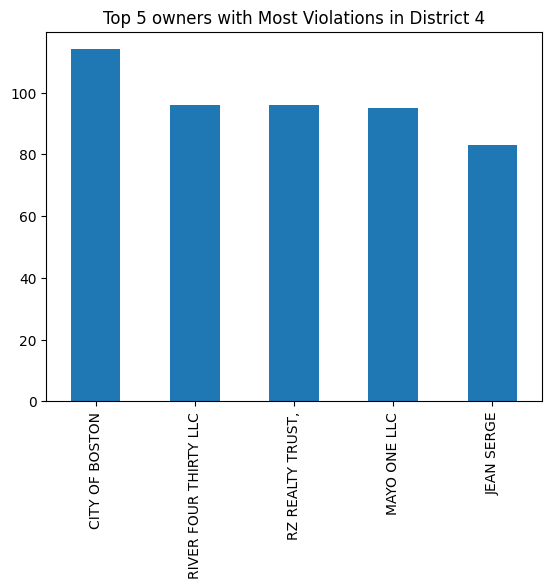

In [368]:
# Getting the top 5 owners with most violations in district 4
district_4['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 4')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


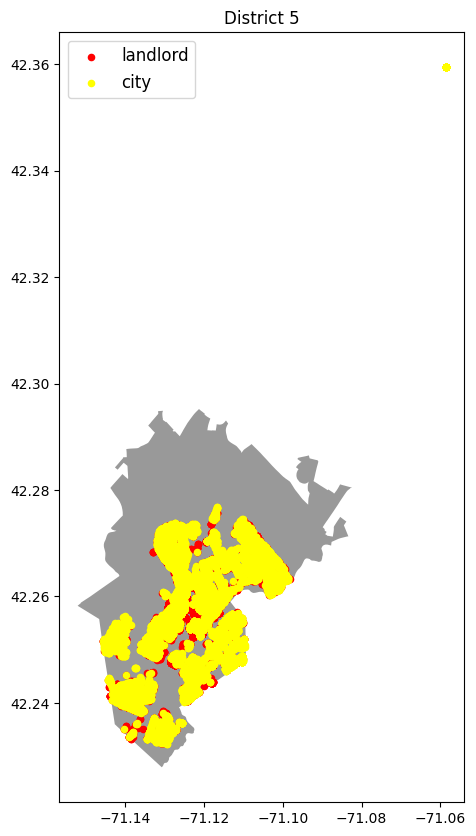

In [369]:

geometry = [Point(xy) for xy in zip(district_5['longitude'], district_5['latitude'])]

shape_5 = shap.loc[shap['LONGNAME']=='District 5']

crs = {'init': 'epsg:4326'}

geo_district_5 = gpd.GeoDataFrame(district_5, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 5')

shape_5.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_5[geo_district_5['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_5[geo_district_5['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 5'}>

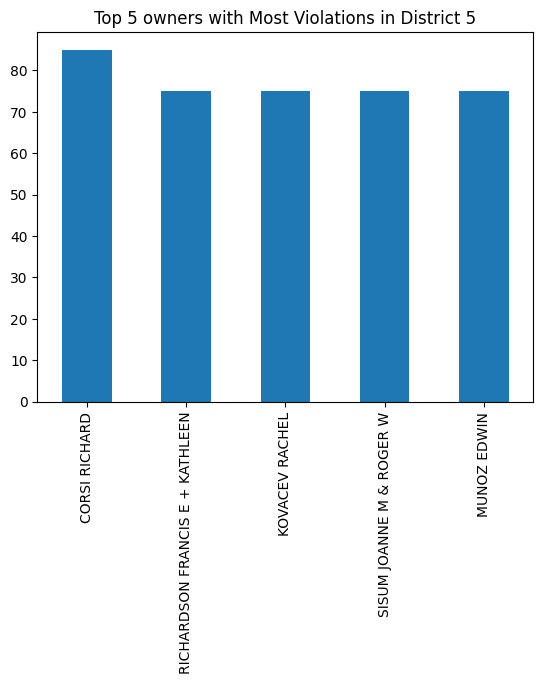

In [370]:
# Getting the top 5 owners with most violations in district 5
district_5['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 5')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


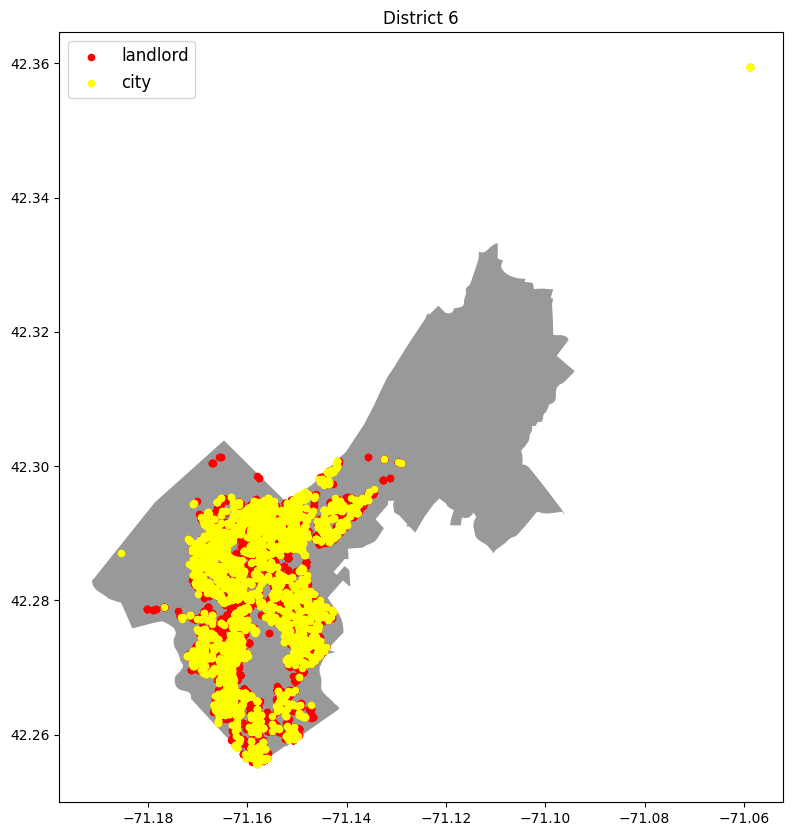

In [371]:

geometry = [Point(xy) for xy in zip(district_6['longitude'], district_6['latitude'])]

shape_6 = shap.loc[shap['LONGNAME']=='District 6']

crs = {'init': 'epsg:4326'}

geo_district_6 = gpd.GeoDataFrame(district_6, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 6')

shape_6.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_6[geo_district_6['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_6[geo_district_6['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 6'}>

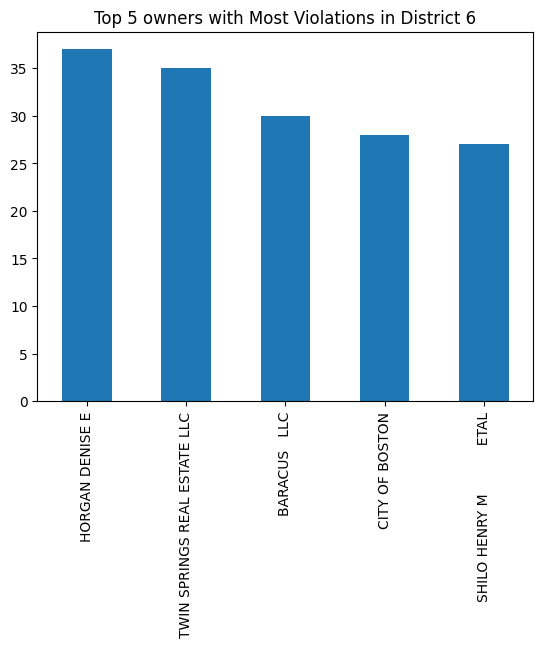

In [372]:
# Getting the top 5 owners with most violations in district 6
district_6['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 6')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'District 7'}>

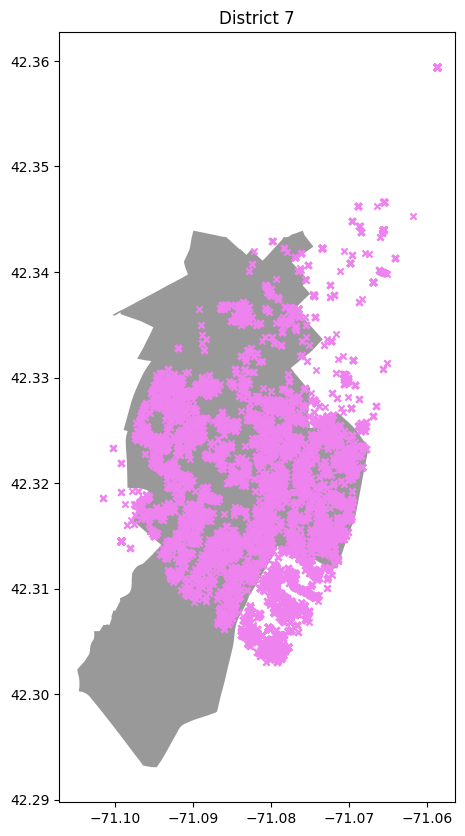

In [373]:
shape_7 = shap.loc[shap['LONGNAME']=='District 7']

geometry = [Point(xy) for xy in zip(district_7['longitude'], district_7['latitude'])]

geo_district_7 = gpd.GeoDataFrame(district_7, crs= crs, geometry = geometry)
fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 7')

shape_7.plot(ax = ax, alpha = 0.4, color = 'black')

geo_district_7.plot(ax = ax, markersize = 20, color = 'violet', marker = 'x')

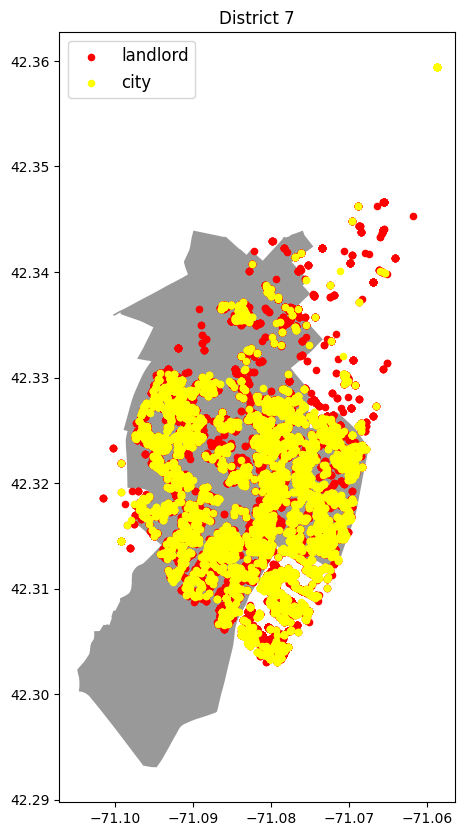

In [374]:


crs = {'init': 'epsg:4326'}



fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 7')

shape_7.plot(ax = ax, alpha = 0.4, color = 'black')

geo_district_7[geo_district_7['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_7[geo_district_7['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})


<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 7'}>

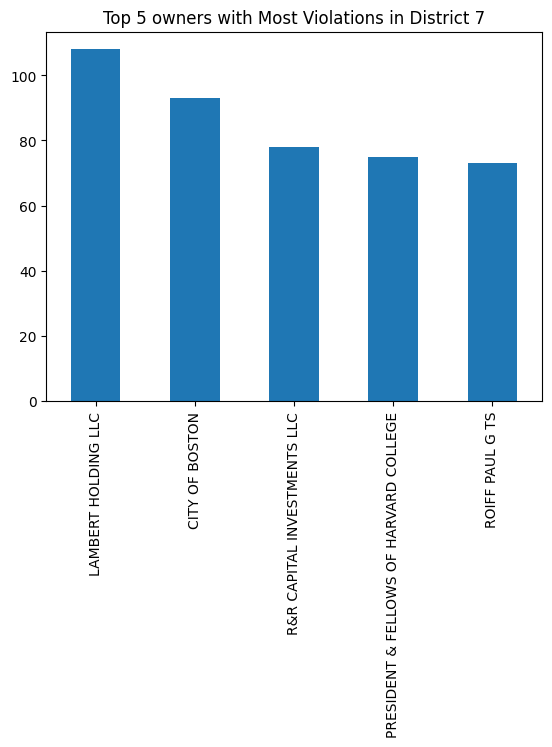

In [375]:
# Getting the top 5 owners with most violations in district 7
district_7['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 7')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


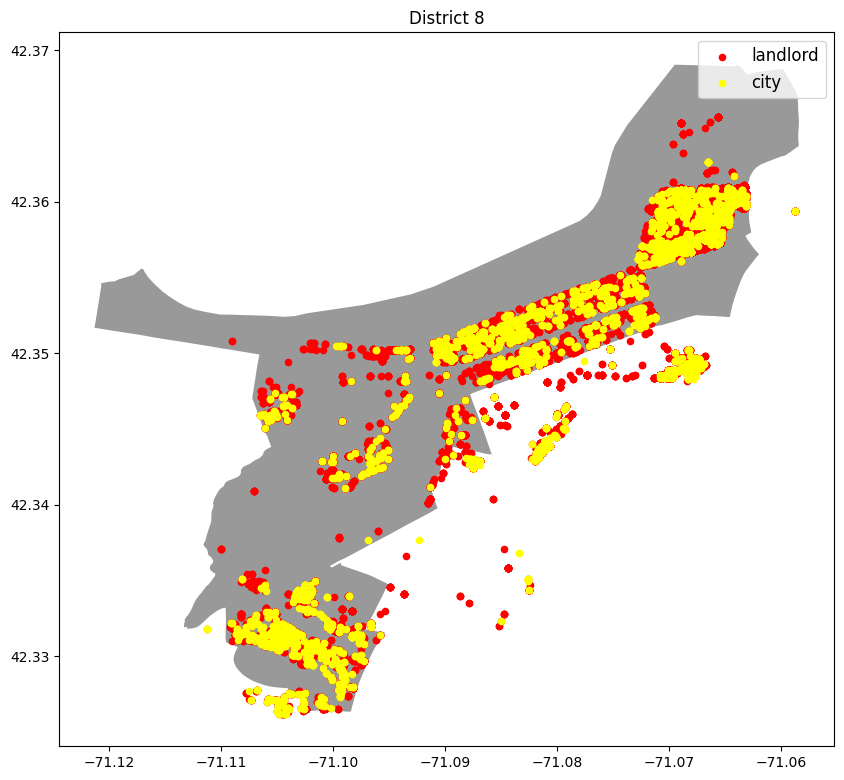

In [376]:

geometry = [Point(xy) for xy in zip(district_8['longitude'], district_8['latitude'])]

shape_8 = shap.loc[shap['LONGNAME']=='District 8']

crs = {'init': 'epsg:4326'}

geo_district_8 = gpd.GeoDataFrame(district_8, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 8')

shape_8.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_8[geo_district_8['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_8[geo_district_8['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})

<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 8'}>

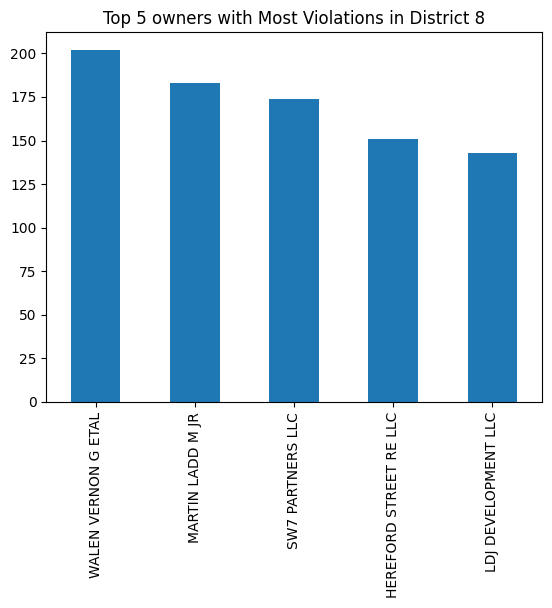

In [377]:
# Getting the top 5 owners with most violations in district 8
district_8['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 8')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'District 9'}>

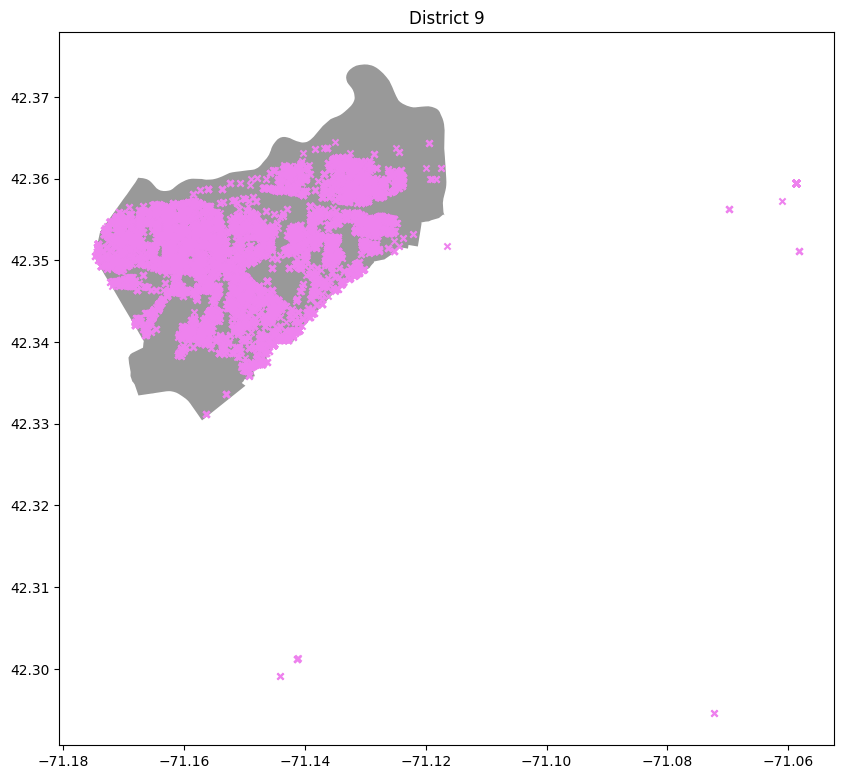

In [378]:
shape_9 = shap.loc[shap['LONGNAME']=='District 9']

geometry = [Point(xy) for xy in zip(district_9['longitude'], district_9['latitude'])]

geo_district_9 = gpd.GeoDataFrame(district_9, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 9')

shape_9.plot(ax = ax, alpha = 0.4, color = 'black')

geo_district_9.plot(ax = ax, markersize = 20, color = 'violet', marker = 'x')

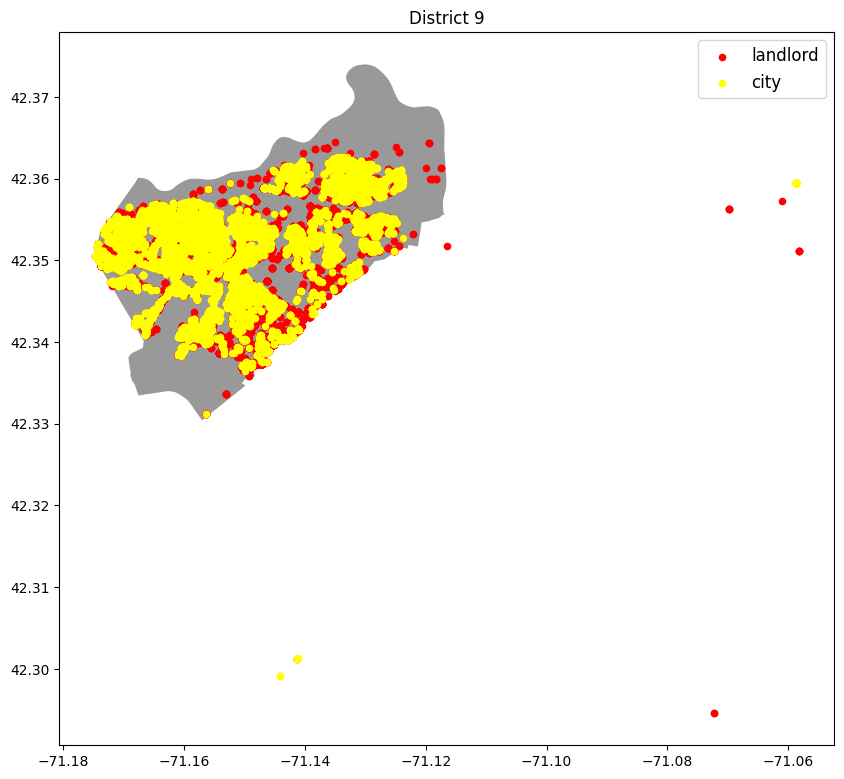

In [379]:


crs = {'init': 'epsg:4326'}



fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('District 9')

shape_9.plot(ax = ax, alpha = 0.4, color = 'black')

#geo_district_1.plot(ax = ax, markersize = 20, color = 'green', marker = 'x')
geo_district_9[geo_district_9['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_district_9[geo_district_9['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})

<AxesSubplot: title={'center': 'Top 5 owners with Most Violations in District 9'}>

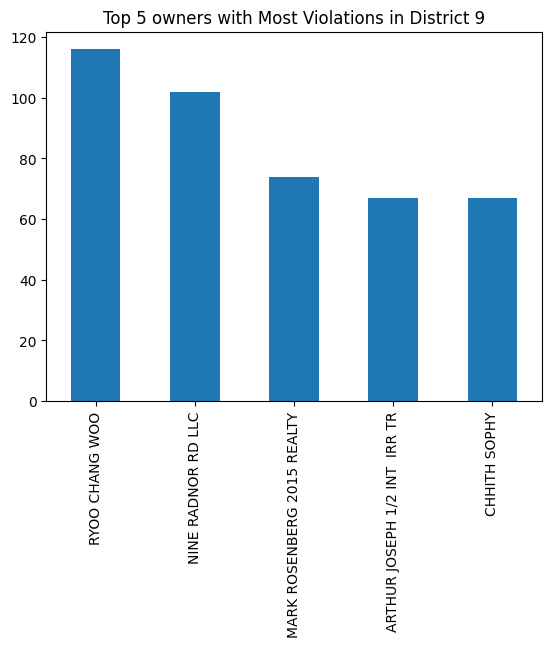

In [380]:
# Getting the top 5 owners with most violations in district 9
district_9['owner_name'].value_counts().nlargest(5).plot(kind='bar', title = 'Top 5 owners with Most Violations in District 9')

/Users/charlton/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


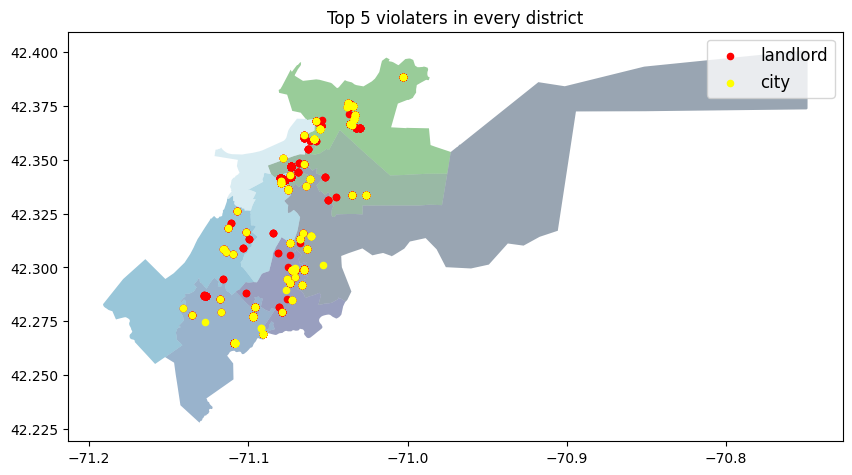

In [381]:
#testing to see if we can plot owners

geometry = [Point(xy) for xy in zip(top5['longitude'], top5['latitude'])]

geo_top5_owners = gpd.GeoDataFrame(top5, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 5 violaters in every district')

shap.plot(ax = ax, alpha = 0.4, cmap = 'ocean')


geo_top5_owners[geo_top5_owners['fault'] =='landlord'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'landlord')
geo_top5_owners[geo_top5_owners['fault'] =='city'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'city')

plt.legend(prop={'size': 12})

In [382]:
#fig,ax = plt.subplots(figsize = (10,10))

#shape_1.plot(ax = ax, alpha = 0.4, color = 'grey', cmap = 'ocean')

#geo_df[geo_df['violation_severity'] == 'low'].plot(ax = ax, markersize = 20, color = 'green', marker = 'x', label = 'low')
#geo_df[geo_df['violation_severity'] =='high'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'high')
#geo_df[geo_df['violation_severity'] == 'medium'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'medium')

#plt.legend(prop={'size': 12})